<a href="https://colab.research.google.com/github/dharinidakshin05/CODSOFT-TASKS/blob/main/task3_d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

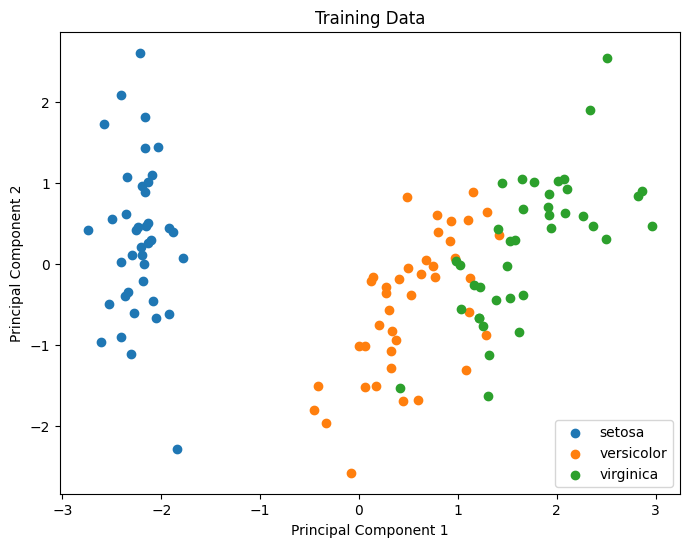

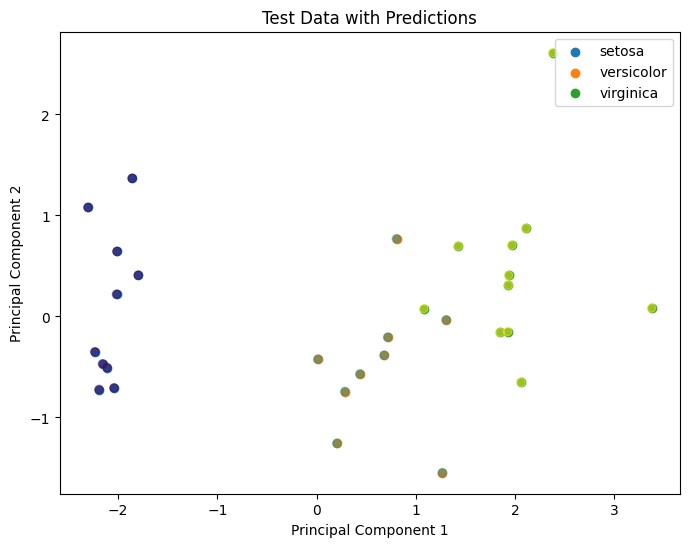

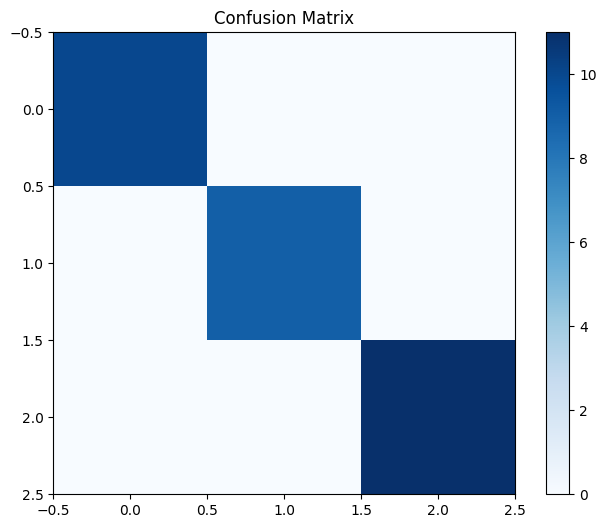

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris() # Remove the file path argument

# Print the dataset description
print(iris.DESCR)

# Print the feature names
print("Feature Names:", iris.feature_names)

# Print the target names (species)
print("Target Names:", iris.target_names)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

# Create an SVM classifier object
svm = SVC(kernel='rbf', C=1, random_state=42)

# Train the model using the scaled training data
svm.fit(X_train_scaled, y_train)

# Predict the labels for the testing data
y_pred = svm.predict(X_test_scaled)

# Print the accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Reduce the dimensionality of the data using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Plot the training data
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], label=iris.target_names[i])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Training Data")
plt.legend()
plt.show()

# Plot the test data with predictions
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(X_test_pca[y_test == i, 0], X_test_pca[y_test == i, 1], label=iris.target_names[i])
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='viridis', alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Test Data with Predictions")
plt.legend()
plt.show()

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix(y_test, y_pred), interpolation='nearest', cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()